<a id="top"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Table of content</b></div>

<div style="background-color:aliceblue; padding:30px; font-size:15px;color:#034914">
    
* [1. Introduction](#1)
    - [Problem statement](#1.1)
    - [Data description](#1.2)
    
* [2. Import Libraries](#2) 
    
* [3. Basic Exploration](#3)
    - [Read dataset](#3.1)
    - [Some information](#3.2)
    - [Data transformation](#3.3)
    - [Data visualization](#3.4)
* [4. Machine Learning model](#4)
    
* [5 Conclusion](#5)

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Introduction</b></div>

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Problem</b> statement

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> description

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Import Libraries</b></div>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Scalling & Normalization
# for Box-Cox Transformation
from scipy import stats
# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# Plotting modules
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

print("Setup Complete")

Setup Complete


[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Basic Exploration</b></div>

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Read</b> dataset

In [2]:
def read_dataset(file_path, index_name = None):
    if index_name != None:
        data = pd.read_csv(file_path, index_col = index_name)
    else:
        data = pd.read_csv(file_path)
    return data

In [3]:
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = read_dataset(file_path)

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Some</b> information

In [4]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
data.shape

(800, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                800 non-null    int64  
 1   Gender                   800 non-null    object 
 2   Age                      800 non-null    int64  
 3   Occupation               800 non-null    object 
 4   Sleep Duration           800 non-null    float64
 5   Quality of Sleep         800 non-null    int64  
 6   Physical Activity Level  800 non-null    int64  
 7   Stress Level             800 non-null    int64  
 8   BMI Category             800 non-null    object 
 9   Blood Pressure           800 non-null    object 
 10  Heart Rate               800 non-null    int64  
 11  Daily Steps              800 non-null    int64  
 12  Sleep Disorder           372 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 81.4+ KB


In [7]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,41.192500,7.142125,6.537500,58.266250,5.230000,72.188750,7072.992500
std,231.0844,8.513874,0.813505,1.381477,17.924689,1.760248,5.044545,1477.883856
min,1.0000,27.000000,5.500000,3.000000,30.000000,3.000000,65.000000,3000.000000
25%,200.7500,34.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,400.5000,41.000000,7.200000,6.000000,60.000000,5.000000,72.000000,7000.000000
75%,600.2500,47.250000,7.800000,8.000000,73.250000,7.000000,75.000000,8000.000000
max,800.0000,59.000000,9.000000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
data.nunique()

Person ID                  800
Gender                       2
Age                         33
Occupation                  11
Sleep Duration              35
Quality of Sleep             7
Physical Activity Level     61
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  21
Daily Steps                426
Sleep Disorder               2
dtype: int64

In [9]:
data.duplicated().any()

np.False_

[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> transformation

[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Missing Data Treatment</b></span>

In [10]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  800


,Total Missing,In Percent
Sleep Disorder,428,53.5
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
Person ID,0,0.0
Sleep Duration,0,0.0
Quality of Sleep,0,0.0
Stress Level,0,0.0
Physical Activity Level,0,0.0
BMI Category,0,0.0


[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Duplicated Data Treatment</b></span>

[//]: <> (Text)
<span style="font-size:14px; font-family:Verdana;"> 
None!
</span>

[//]: <> (Missing Data Treatment)
> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Cleaning & Processing Data</b></span>

In [11]:
# Check probity of data
print(data['Gender'].unique()) # ['Male', 'Female']
print(data['BMI Category'].unique()) # ['Overweight', 'Obese', 'Normal']
print(data['Sleep Disorder'].unique()) # ['None', 'Insomnia', 'Sleep Apnea']

['Male' 'Female']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
[nan 'Sleep Apnea' 'Insomnia']


In [12]:
def fix_BMI (x):
    if x == 'Normal Weight':
        return 'Normal'
    return x

data['BMI Category'] = data['BMI Category'].apply(lambda x : fix_BMI(x))

In [13]:
# Data collection
data.insert(loc = 2, column = 'Age Group', value = pd.cut(x = data['Age'], bins=[0, 16, 30, 45, 100], labels=['Child', 'Young Adults', 'Middle-aged Adults', 'Old Adults']))

In [14]:
def blood_pressure_targets(bp):
    result = None
    sys, dias = map(int, bp.split('/'))
    if sys < 90 or dias < 60:
        result = 'Low'
    elif sys < 120 and dias < 80:
        result = 'Normal'
    elif sys in range(120, 130) and dias < 80:
        result = 'Elevated'
    elif sys in range(130, 140) or dias in range(80,90):
        result = 'Hypertension Stage 1'
    elif sys >= 140 or dias >= 90:
        result = 'Hypertension Stage 2'
    elif sys > 180 or dias > 120:
        result = 'Hypertensive Crisis'
    return result

def heart_rate_targets(hr):
    result = None
    if hr < 60:
        result = 'Bradycardia'
    elif hr <= 100:
        result = 'Normal'
    else:
        result = 'Tachycardia'
    return result

In [15]:
data['Blood Pressure'] = data['Blood Pressure'].astype(str)
idx = data.columns.get_loc('Blood Pressure') + 1
data.insert(loc = idx, column = 'Blood Pressure Targets', value = data['Blood Pressure'].apply(lambda x : blood_pressure_targets(x)))

In [16]:
idx = data.columns.get_loc('Heart Rate') + 1
data.insert(loc = idx, column = 'Heart Rate Targets', value = data['Heart Rate'].apply(lambda x : heart_rate_targets(x)))

In [17]:
# Scaling: Physical Activity Level, Heart Rate, Daily Steps
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

original_PALevel = np.array(data['Physical Activity Level'].tolist(), int)
scaled_PALevel = scaler.fit_transform(original_PALevel.reshape(-1, 1)).flatten()

original_HRate = np.array(data['Heart Rate'].tolist(), int)
scaled_HRate = scaler.fit_transform(original_HRate.reshape(-1, 1)).flatten()

original_DSteps = np.array(data['Daily Steps'].tolist(), int)
scaled_DSteps = scaler.fit_transform(original_DSteps.reshape(-1, 1)).flatten()

In [18]:
# Normalization: Sleep Duration, Quality of Sleep, Stress Level
original_SDuration = np.array(data['Sleep Duration'].tolist(), float)
normalized_SDuration = stats.boxcox(original_SDuration)

original_SQuality = np.array(data['Quality of Sleep'].tolist(), int)
normalized_SQuality = stats.boxcox(original_SQuality)

original_SLevel = np.array(data['Stress Level'].tolist(), int)
normalized_SLevel = stats.boxcox(original_SLevel)

In [19]:
data.head()

,Person ID,Gender,Age Group,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Blood Pressure Targets,Heart Rate,Heart Rate Targets,Daily Steps,Sleep Disorder
0,1,Male,Young Adults,27,Software Engineer,6.1,6,42,6,Overweight,126/83,Hypertension Stage 1,77,Normal,4200,NaN
1,2,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,Hypertension Stage 1,75,Normal,10000,NaN
2,3,Male,Young Adults,28,Doctor,6.2,6,60,8,Normal,125/80,Hypertension Stage 1,75,Normal,10000,NaN
3,4,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Sleep Apnea
4,5,Male,Young Adults,28,Sales Representative,5.9,4,30,8,Obese,140/90,Hypertension Stage 2,85,Normal,3000,Sleep Apnea


[//]: <> (Problem Statement)
<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Data</b> visualization

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Features Counting</b></span>

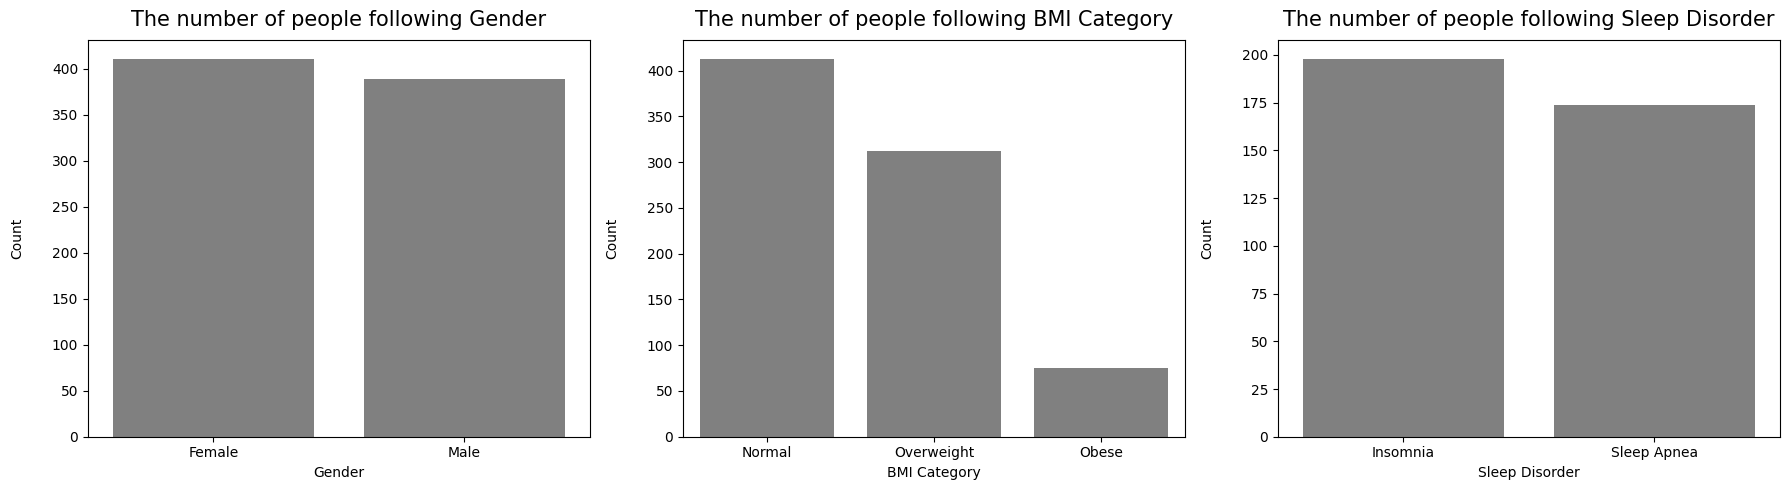

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18,5)) 

col_names = ['Gender', 'BMI Category', 'Sleep Disorder']
for i in range(0, len(col_names)):
    temp_df = data[col_names[i]].value_counts().reset_index()
    temp_df.columns = [col_names[i], 'count']  # Rename columns properly
    sns.barplot(ax=axes[i], data=temp_df, x=col_names[i], y='count', color='grey')
    axes[i].set_title(f"The number of people following {col_names[i]}", pad=10, fontsize=15)
    axes[i].set_ylabel("Count", labelpad=20)

plt.tight_layout()

plt.show()

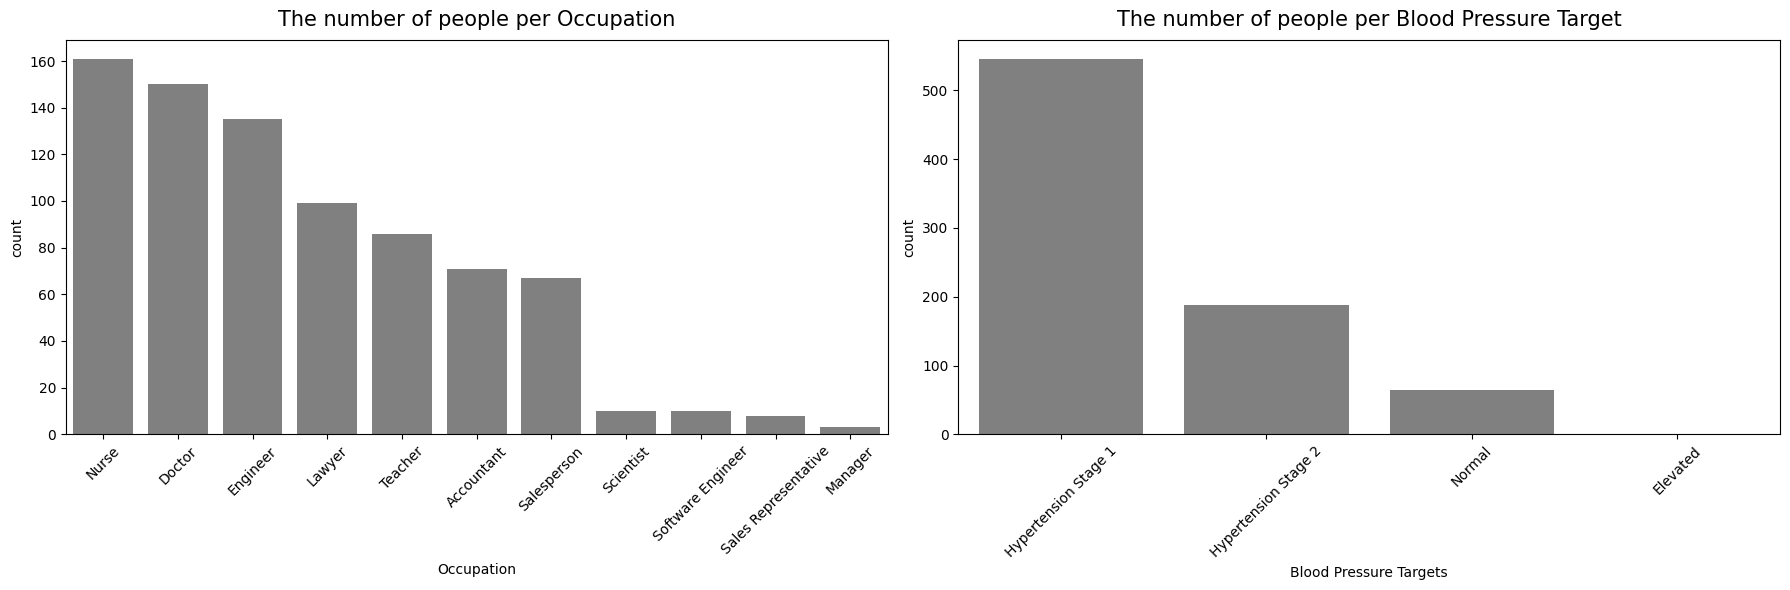

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Fix for Occupation
occupation_df = data['Occupation'].value_counts().reset_index()
occupation_df.columns = ['Occupation', 'count']
sns.barplot(ax=axes[0], data=occupation_df, x='Occupation', y='count', color='grey')

# Fix for Blood Pressure Targets
bp_df = data['Blood Pressure Targets'].value_counts().reset_index()
bp_df.columns = ['Blood Pressure Targets', 'count']
sns.barplot(ax=axes[1], data=bp_df, x='Blood Pressure Targets', y='count', color='grey')

# Set titles
axes[0].set_title("The number of people per Occupation", pad=10, fontsize=15)
axes[1].set_title("The number of people per Blood Pressure Target", pad=10, fontsize=15)

# Optional: rotate x-ticks if too crowded
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


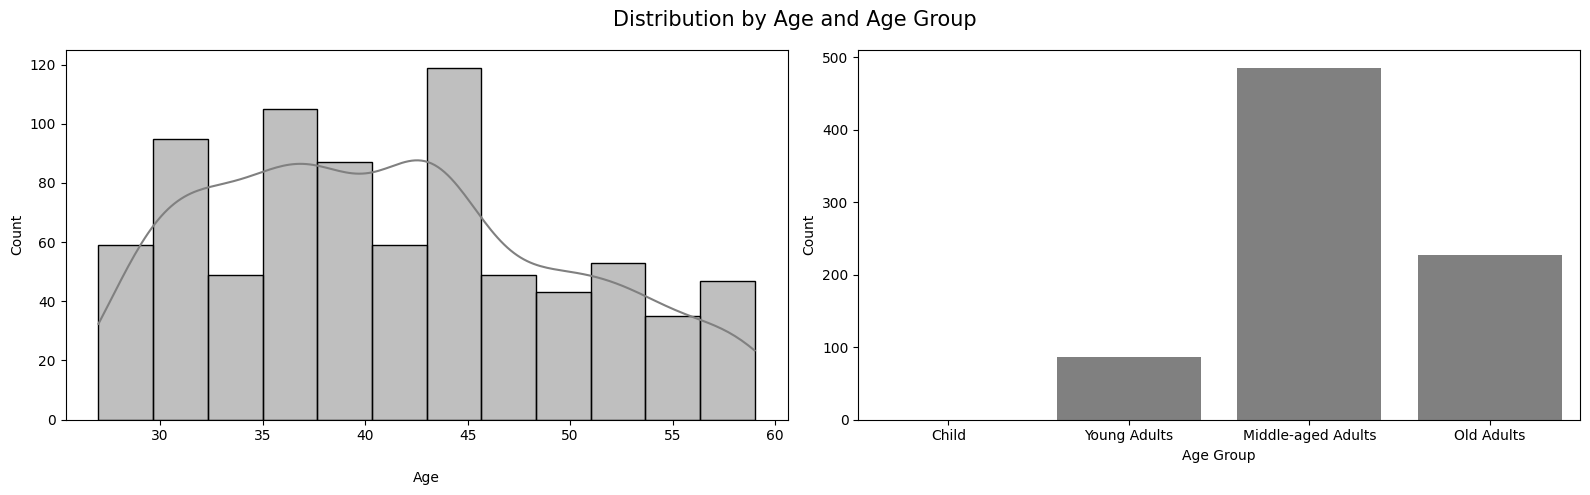

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of Age
sns.histplot(ax=axes[0], data=data['Age'], color='grey', kde=True)

# Barplot of Age Group
age_group_df = data['Age Group'].value_counts().reset_index()
age_group_df.columns = ['Age Group', 'count']
sns.barplot(ax=axes[1], data=age_group_df, x='Age Group', y='count', color='grey')

# Titles and labels
fig.suptitle("Distribution by Age and Age Group", fontsize=15)
axes[0].set_xlabel('Age', labelpad=20)
axes[0].set_ylabel('Count')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Scalling & Normalization</b></span>

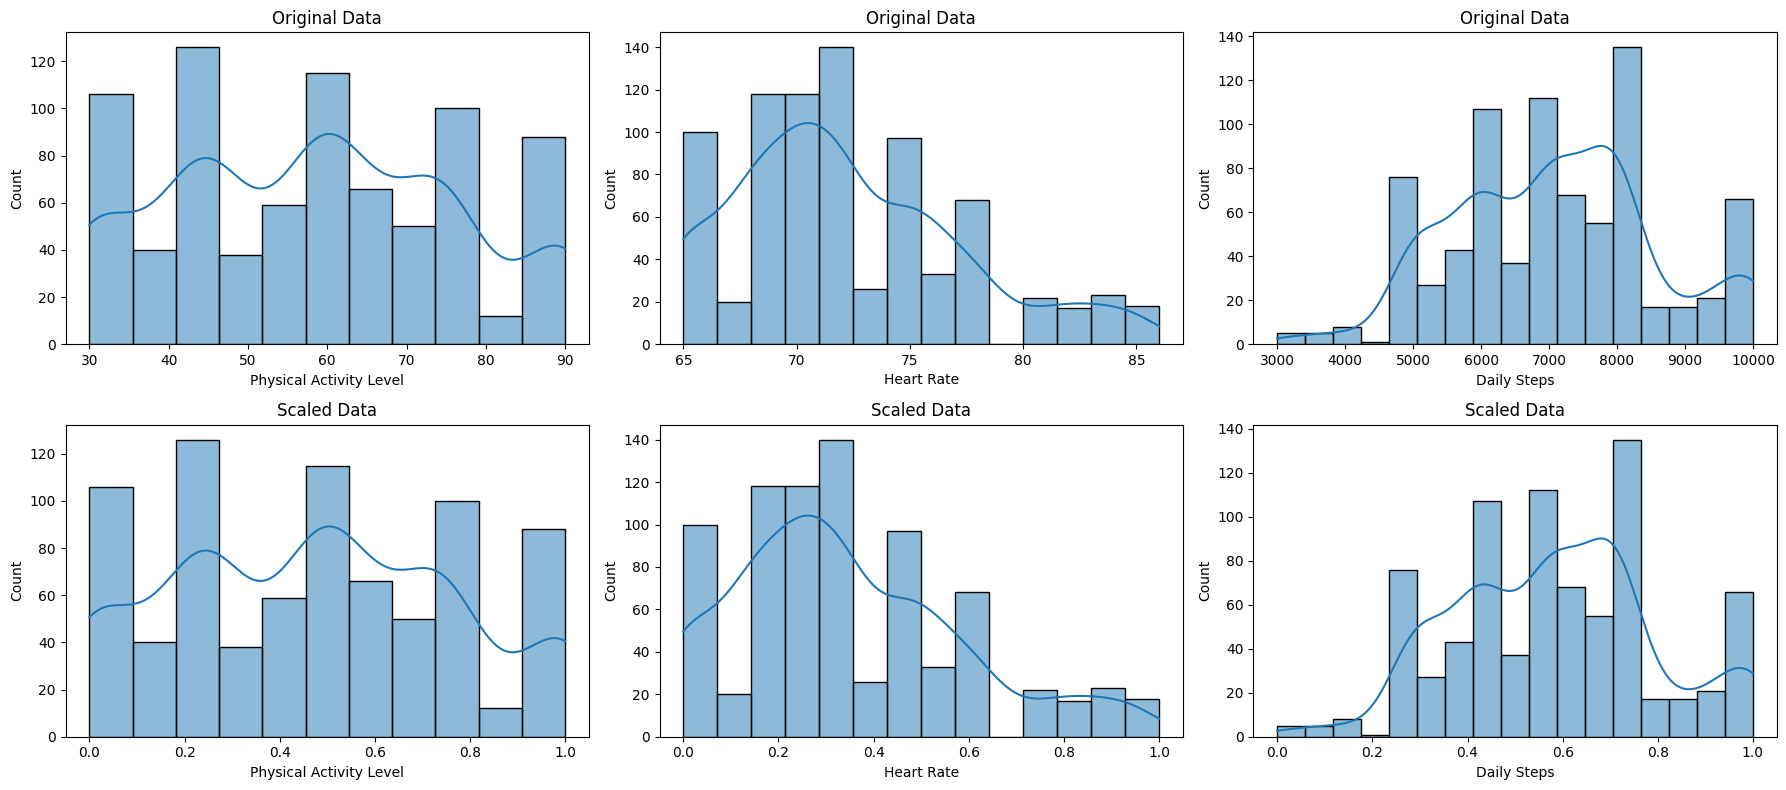

In [23]:
# Scalling data

original_datas = [original_PALevel, original_HRate, original_DSteps]
scaled_datas = [scaled_PALevel, scaled_HRate, scaled_DSteps]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
x_labels = ['Physical Activity Level', 'Heart Rate', 'Daily Steps']
titles = ['Original Data', 'Scaled Data']

for i in range(3):
    sns.histplot(original_datas[i], ax=axes[0, i], kde=True, legend=False)
    sns.histplot(scaled_datas[i], ax=axes[1, i], kde=True, legend=False)
    
    axes[0, i].set_title(titles[0])
    axes[1, i].set_title(titles[1])
    
    axes[0, i].set_xlabel(x_labels[i])
    axes[1, i].set_xlabel(x_labels[i])

plt.tight_layout()
plt.show()


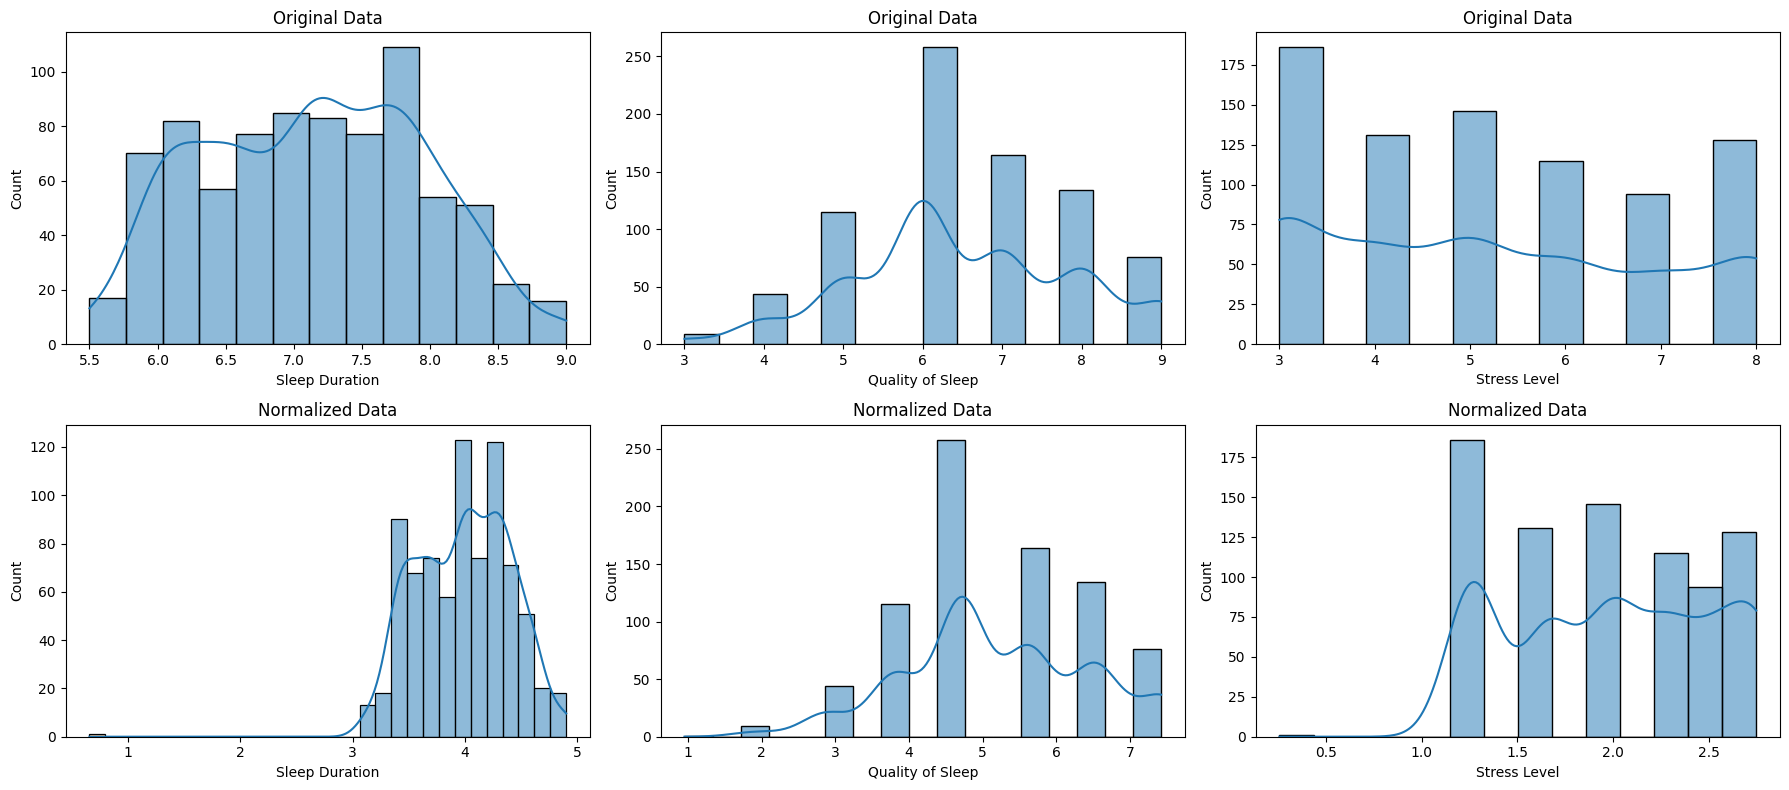

In [24]:
# Normalized data: Quality of Sleep, Stress Level

original_datas = [original_SDuration, original_SQuality, original_SLevel]
normalized_datas = [normalized_SDuration, normalized_SQuality, normalized_SLevel]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
x_labels = ['Sleep Duration', 'Quality of Sleep', 'Stress Level']
titles = ['Original Data', 'Normalized Data']

for i in range(3):
    sns.histplot(original_datas[i], ax=axes[0, i], kde=True, legend=False)
    sns.histplot(normalized_datas[i], ax=axes[1, i], kde=True, legend=False)
    
    axes[0, i].set_title(titles[0])
    axes[1, i].set_title(titles[1])
    
    axes[0, i].set_xlabel(x_labels[i])
    axes[1, i].set_xlabel(x_labels[i])

plt.tight_layout()
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Factors affecting quality of sleep</b></span>

<Figure size 1800x500 with 0 Axes>

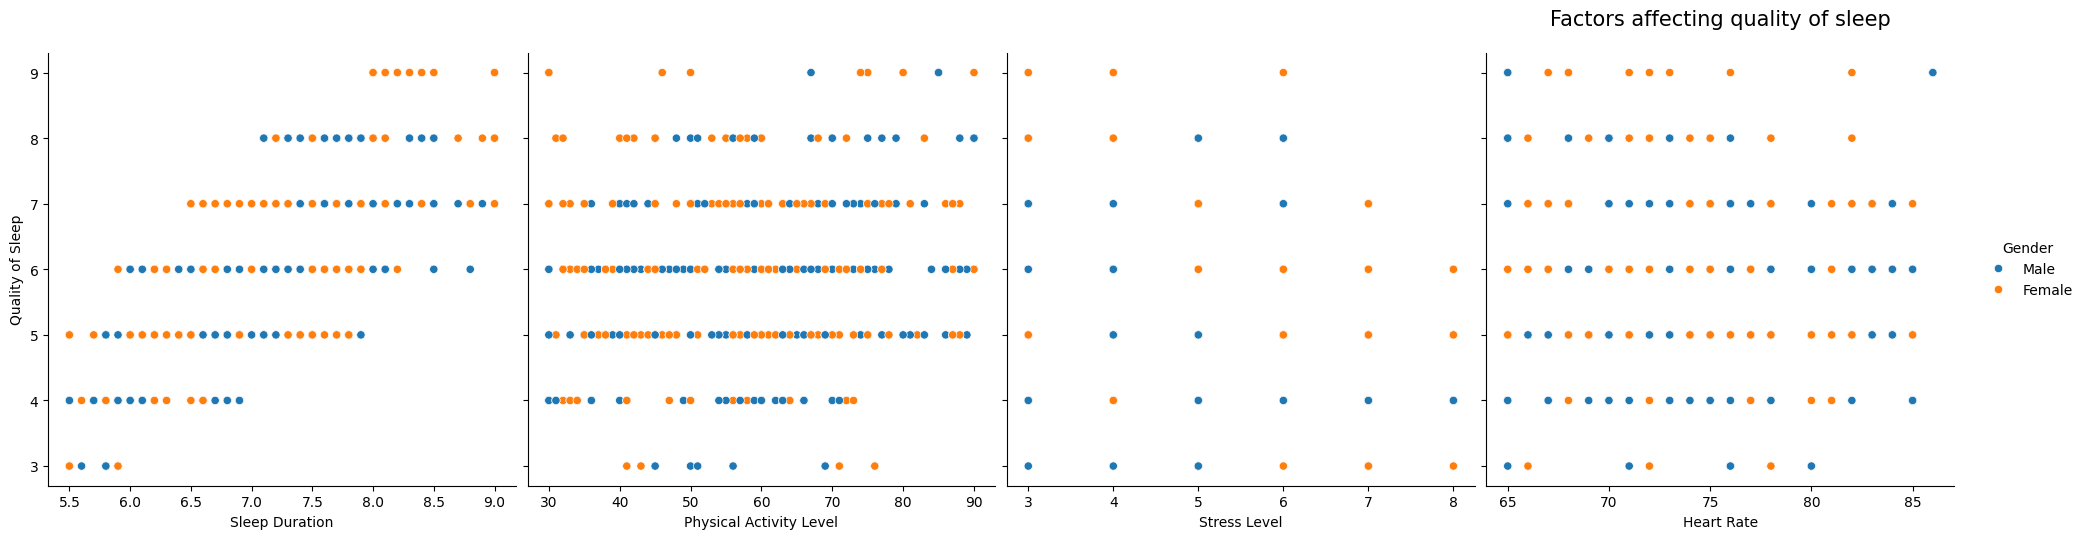

In [25]:
fig = plt.figure(figsize= (18,5))

sns.pairplot(data = data, x_vars = ['Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate'], y_vars = ['Quality of Sleep'], hue = 'Gender', height = 5)
plt.title('Factors affecting quality of sleep', pad = 20, fontsize = 15)
plt.axis('tight')
plt.show()

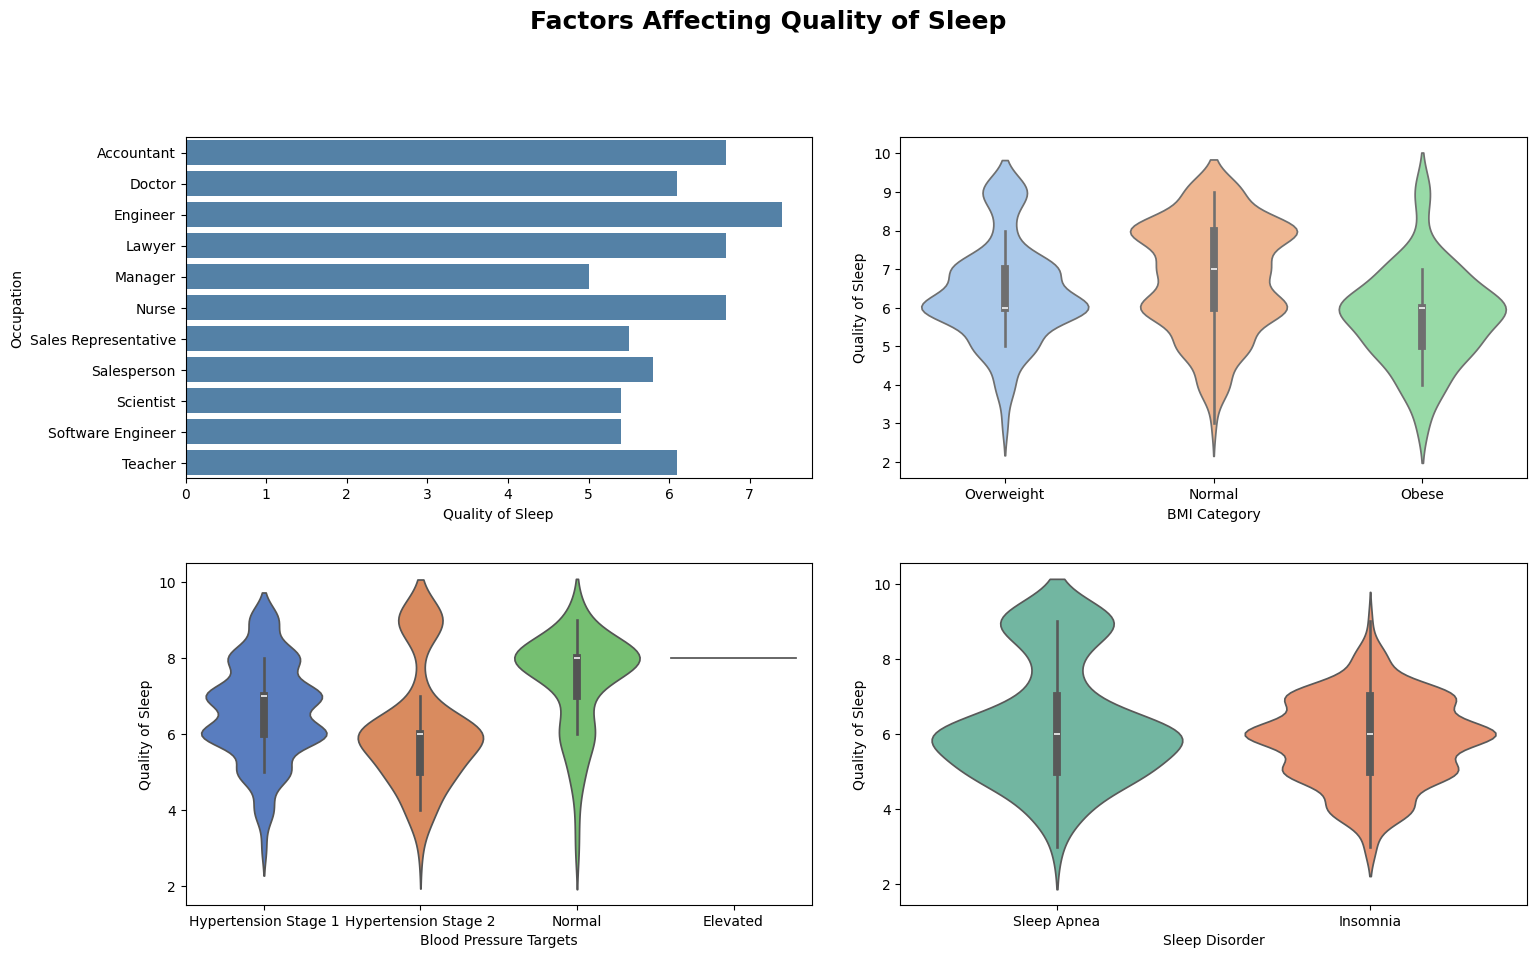

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Barplot: Quality of Sleep by Occupation (with consistent color and no legend)
sns.barplot(
    ax=axes[0, 0],
    data=data.groupby('Occupation')['Quality of Sleep'].mean().round(1).reset_index(),
    x='Quality of Sleep',
    y='Occupation',
    color='steelblue'  # solid, consistent color
)

# Violin plots for other factors
sns.violinplot(ax=axes[0, 1], data=data, x='BMI Category', y='Quality of Sleep', hue='BMI Category', palette='pastel', legend=False)
sns.violinplot(ax=axes[1, 0], data=data, x='Blood Pressure Targets', y='Quality of Sleep', hue='Blood Pressure Targets', palette='muted', legend=False)
sns.violinplot(ax=axes[1, 1], data=data, x='Sleep Disorder', y='Quality of Sleep', hue='Sleep Disorder', palette='Set2', legend=False)


# Title and layout tweaks
fig.suptitle("Factors Affecting Quality of Sleep", fontsize=18, fontweight='bold')
plt.tight_layout(pad=3.0, rect=[0, 0, 1, 0.96])  # Leave room for title
plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Causes of stress level</b></span>

fig, axes = plt.subplots(2, 2, figsize = (16,10))

sns.barplot(ax = axes[0, 0], data = data.groupby('Occupation')['Stress Level'].mean().round(1).reset_index(), x = 'Stress Level', y = 'Occupation', palette = "Blues")
sns.violinplot(ax = axes[0, 1], data = data, x = 'BMI Category', y = 'Stress Level')
sns.violinplot(ax = axes[1, 0], data = data, x = 'Blood Pressure Targets', y = 'Stress Level')
sns.violinplot(ax = axes[1, 1], data = data, x = 'Sleep Disorder', y = 'Stress Level')

fig.suptitle("Factors affecting Stress Level", fontsize = 15)

plt.tight_layout(pad = 2)
plt.show()

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Causes of sleep disorder</b></span>

In [27]:
effect_of_BMI_category = data.groupby(['Sleep Disorder', 'BMI Category']).size().reset_index()
effect_of_BMI_category.columns = ['Sleep Disorder', 'BMI Category', 'Count']
effect_of_blood_pressure_targets = data.groupby(['Sleep Disorder', 'Blood Pressure Targets']).size().reset_index()
effect_of_blood_pressure_targets.columns = ['Sleep Disorder', 'Blood Pressure Targets', 'Count']


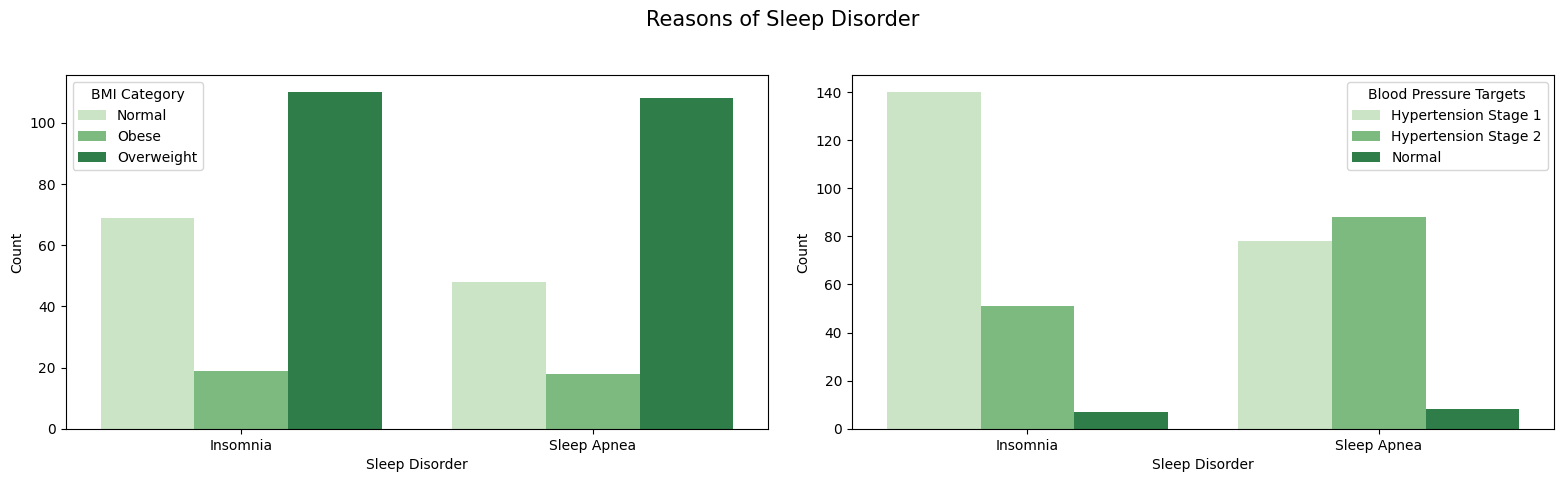

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (16,5))

sns.barplot(ax = axes[0], data = effect_of_BMI_category, x = 'Sleep Disorder', y = 'Count', hue = 'BMI Category', palette = "Greens")
sns.barplot(ax = axes[1], data = effect_of_blood_pressure_targets, x = 'Sleep Disorder', y = 'Count', hue = 'Blood Pressure Targets', palette = "Greens")

fig.suptitle("Reasons of Sleep Disorder", fontsize = 15)

plt.tight_layout(pad = 2)
plt.show()

[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Machine Learning Model</b></div>

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Import</b> libraries

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from category_encoders import MEstimateEncoder

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Useful</b> functions

In [30]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [31]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [32]:
def make_mi_scores(X, y):
    X = X.copy()
    # Label encoding for categoricals
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index = X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [33]:
def score_dataset(X, y, model = XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

<a id="1.2"></a>
<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: #155D07; background-color: #ffffff;"><b>Feature</b> engineering

In [34]:
file_path = 'Sleep_health_and_lifestyle_dataset.csv'
data = read_dataset(file_path, 'Person ID')

X = data.copy()
y = X.pop("Quality of Sleep")

score =  score_dataset(X, y)
print(f"Score: {score:.5f} RMSLE")


Score: 0.15201 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Mutual Information</b></span>

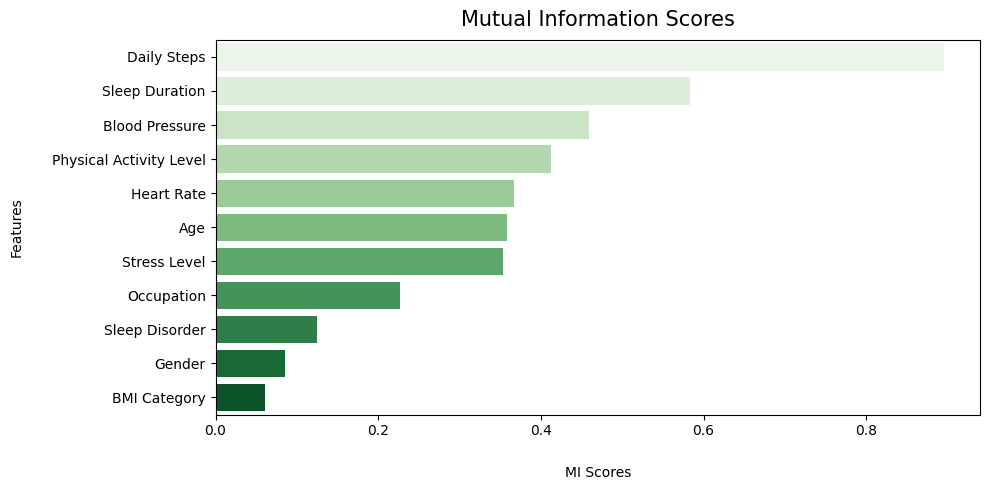

In [35]:
# Ensure mi_scores is a named Series
mi_scores = make_mi_scores(X, y)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores.name = "MI Scores"  # name the column

# Convert to DataFrame for seaborn
mi_df = mi_scores.reset_index().rename(columns={"index": "Feature"})

# Plot
fig = plt.figure(figsize=(10, 5))
sns.barplot(data=mi_df, x="MI Scores", y="Feature", palette="Greens")

plt.title("Mutual Information Scores", pad=10, fontsize=15)
plt.ylabel("Features", labelpad=20)
plt.xlabel("MI Scores", labelpad=20)

plt.tight_layout()
plt.show()


In [36]:
data = data.drop(['Sleep Disorder', 'BMI Category', 'Gender'], axis = 1)

X = data.copy()
y = X.pop('Quality of Sleep')

# Results
score =  score_dataset(X, y)
print(f"Score: {score:.5f} RMSLE")

Score: 0.15173 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Principal Component Analysis - PCA</b></span>

In [37]:
X = data.copy()
features = ['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
X = X.loc[:, features]

pca, X_pca, loadings = apply_pca(X)
print(loadings)

                              PC1       PC2       PC3       PC4       PC5
Age                      0.271214 -0.468746  0.739110  0.393358 -0.075542
Stress Level            -0.144298  0.622173  0.038803  0.768483  0.002534
Heart Rate              -0.325137  0.452995  0.669454 -0.462149  0.165323
Physical Activity Level  0.669110  0.205872 -0.019571 -0.042398  0.712550
Daily Steps              0.593463  0.381563  0.060495 -0.198303 -0.677663


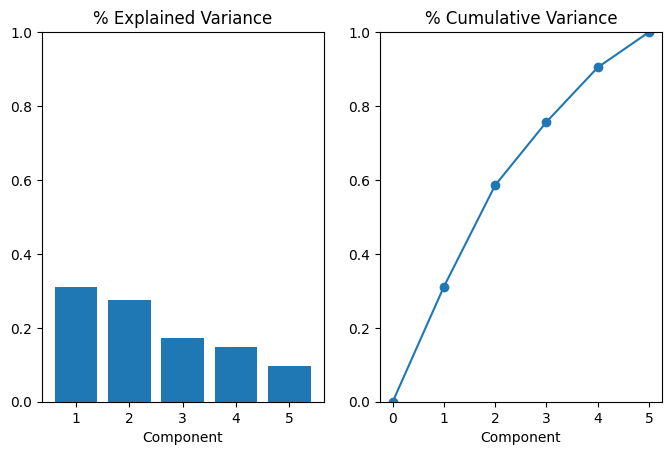

In [38]:
plot_variance(pca);

In [39]:
X = data.copy()
y = X.pop("Quality of Sleep")

X = X.join(X_pca)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

Your score: 0.14328 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Clustering With K-Means</b></span>

In [40]:
X = data.copy()
# features = ['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
features = ['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X["Cluster"] = X["Cluster"].astype("category")

# Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(X_scaled)
# centroids 0 - 9

# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])


In [41]:
X = data.copy()
y = X.pop("Quality of Sleep")

X = X.join(X_cd)
score = score_dataset(X, y)
print(f"Your score: {score:.5f} RMSLE")

Your score: 0.16781 RMSLE


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>
Build Final Model</b></span>

In [42]:
X_full = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['Quality of Sleep'], inplace=True)
y = X_full['Quality of Sleep']
X_full.drop(['Quality of Sleep'], axis=1, inplace=True)

X_full = X_full.join(X_cd)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, train_size=0.8, test_size=0.2, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()



In [43]:

def get_preprocessor(numerical_cols, categorical_cols):
    # Preprocessing for numerical data
    numerical_transformer = SimpleImputer(strategy='constant')

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    return preprocessor

def get_pipeline(model, preprocessor = get_preprocessor(numerical_cols, categorical_cols)):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
    return pipeline

def score_model(model, X_t = X_train, X_v = X_valid, y_t = y_train, y_v = y_valid):
    pipeline = get_pipeline(model)
    pipeline.fit(X_t, y_t)
    preds = pipeline.predict(X_v)
    return mean_absolute_error(y_v, preds)

In [44]:
DT_model = DecisionTreeRegressor(random_state=0)
RF_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
DT_pipeline = get_pipeline(DT_model)
RF_pipeline = get_pipeline(RF_model)

# Evaluate the model
DT_score = score_model(DT_model)
RF_score = score_model(RF_model)
print(f'MAE for Decision Tree Regressor Model: {DT_score:.5f}')
print(f'MAE for Random Forest Regressor Model: {RF_score:.5f}')

MAE for Decision Tree Regressor Model: 0.45625
MAE for Random Forest Regressor Model: 0.41369


In [45]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 1000, 5000]
for leaf_size in candidate_max_leaf_nodes:
    model = DecisionTreeRegressor(max_leaf_nodes = leaf_size, random_state = 0)
    score = round(score_model(model),5)
    print("Leaf size {} MAE: {}".format(leaf_size, score))

Leaf size 5 MAE: 0.70471
Leaf size 25 MAE: 0.42648
Leaf size 50 MAE: 0.45873
Leaf size 100 MAE: 0.46274
Leaf size 250 MAE: 0.45625
Leaf size 500 MAE: 0.45625
Leaf size 1000 MAE: 0.45625
Leaf size 5000 MAE: 0.45625


In [46]:
# Define the models
model_1 = RandomForestRegressor(n_estimators = 50, random_state=0)
model_2 = RandomForestRegressor(n_estimators = 100, random_state=0)
model_3 = RandomForestRegressor(n_estimators = 100, criterion = 'absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators = 200, min_samples_split = 20, random_state=0)
model_5 = RandomForestRegressor(n_estimators = 100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print(f"Model {i+1} MAE: {mae:.5f}")

Model 1 MAE: 0.41075
Model 2 MAE: 0.41369
Model 2 MAE: 0.41369
Model 3 MAE: 0.43494
Model 3 MAE: 0.43494
Model 4 MAE: 0.40376
Model 4 MAE: 0.40376
Model 5 MAE: 0.40896
Model 5 MAE: 0.40896


In [47]:
def get_preprocessor(numerical_cols, categorical_cols):
	# Preprocessing for numerical data
	numerical_transformer = SimpleImputer(strategy='constant')

	# Preprocessing for categorical data
	categorical_transformer = Pipeline(steps=[
		('imputer', SimpleImputer(strategy='constant')),
		('onehot', OneHotEncoder(handle_unknown='ignore'))
	])

	# Bundle preprocessing for numerical and categorical data
	preprocessor = ColumnTransformer(
		transformers=[
			('num', numerical_transformer, numerical_cols),
			('cat', categorical_transformer, categorical_cols)
		])
	return preprocessor

def get_pipeline(model, preprocessor = get_preprocessor(numerical_cols, categorical_cols)):
	pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])
	return pipeline

final_model = DecisionTreeRegressor(max_leaf_nodes = 25, random_state = 0)

pipeline = get_pipeline(final_model)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_train)
output = pd.DataFrame({'PassengerId': X_train['Person ID'], 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [48]:
# Fix for the NameError by defining sample_users before using it
sample_users = [
    {
        'Person ID': 991,
        'Gender': 'Female',
        'Age': 28,
        'Occupation': 'Teacher',
        'Sleep Duration': None,
        'Quality of Sleep': 6,
        'Physical Activity Level': 30,
        'Stress Level': 8,
        'BMI Category': 'Normal',
        'Blood Pressure': '120/80',
        'Heart Rate': 72,
        'Daily Steps': 4000,
        'Sleep Disorder': None
    },
    {
        'Person ID': 992,
        'Gender': 'Male',
        'Age': 42,
        'Occupation': 'Sales Representative',
        'Sleep Duration': None,
        'Quality of Sleep': 5,
        'Physical Activity Level': 20,
        'Stress Level': 9,
        'BMI Category': 'Overweight',
        'Blood Pressure': '145/95',
        'Heart Rate': 82,
        'Daily Steps': 3000,
        'Sleep Disorder': None
    },
    {
        'Person ID': 993,
        'Gender': 'Female',
        'Age': 31,
        'Occupation': 'Doctor',
        'Sleep Duration': None,
        'Quality of Sleep': 7,
        'Physical Activity Level': 60,
        'Stress Level': 6,
        'BMI Category': 'Normal',
        'Blood Pressure': '118/75',
        'Heart Rate': 68,
        'Daily Steps': 12000,
        'Sleep Disorder': None
    }
]

# Now the rest of your code should work
what_if_users = [
    {
        'Person ID': 995,
        'Gender': 'Male',
        'Age': 35,
        'Occupation': 'Software Engineer',
        'Sleep Duration': None,
        'Quality of Sleep': 6,
        'Physical Activity Level': 45,
        'Stress Level': 7,
        'BMI Category': 'Normal',
        'Blood Pressure': '125/82',
        'Heart Rate': 75,
        'Daily Steps': 8000,
        'Sleep Disorder': None
    },
    {
        'Person ID': 996,
        'Gender': 'Female',
        'Age': 52,
        'Occupation': 'Nurse',
        'Sleep Duration': None,
        'Quality of Sleep': 4,
        'Physical Activity Level': 25,
        'Stress Level': 8,
        'BMI Category': 'Overweight',
        'Blood Pressure': '135/88',
        'Heart Rate': 78,
        'Daily Steps': 5500,
        'Sleep Disorder': 'Insomnia'
    }
]

# Combine all users for the dashboard
all_users = sample_users + what_if_users

In [49]:
def predict_sleep_duration_advanced(user, pipeline=pipeline, my_cols=my_cols, use_hybrid=True):
    """
    Advanced sleep duration prediction using ML model with domain knowledge adjustments
    """
    # Convert user dictionary to DataFrame format for ML prediction
    user_df = pd.DataFrame([user])
    
    # Extract necessary features for ML prediction
    required_features = [col for col in my_cols if col in user_df.columns]
    missing_features = [col for col in my_cols if col not in user_df.columns]
    
    # For any missing features, use reasonable defaults
    for feature in missing_features:
        if feature == 'Sleep Duration':
            user_df[feature] = 7.0  # Use population average
        elif feature in ['Centroid_0', 'Centroid_1', 'Centroid_2', 'Centroid_3', 
                        'Centroid_4', 'Centroid_5', 'Centroid_6', 'Centroid_7', 
                        'Centroid_8', 'Centroid_9']:
            user_df[feature] = 0.5
    
    # Make initial ML prediction using trained pipeline
    try:
        ml_prediction = pipeline.predict(user_df[my_cols])[0]
    except Exception as e:
        print(f"Warning: ML prediction failed with error: {e}")
        ml_prediction = 7.0  # Fallback to average sleep duration
    
    # If not using hybrid approach, return ML prediction directly
    if not use_hybrid:
        return round(ml_prediction, 1)
    
    # Domain knowledge adjustments with refined weights based on individual factors
    
    # 1. Age-based adjustment - more personalized by age brackets
    if user['Age'] < 18:
        age_factor = 0.5  # Teenagers need significantly more sleep
    elif user['Age'] < 25:
        age_factor = 0.4  # Young adults still need more sleep
    elif user['Age'] < 35:
        age_factor = 0.2  # Adults
    elif user['Age'] < 50:
        age_factor = 0.0  # Middle-aged adults
    elif user['Age'] < 65:
        age_factor = -0.1  # Older adults
    else:
        age_factor = -0.2  # Seniors often need less sleep but have fragmented patterns
    
    # 2. Physical activity adjustment - more nuanced based on activity level and occupation
    activity_level = user['Physical Activity Level']
    occupation = user['Occupation']
    
    # High physical demand jobs get extra adjustment
    physical_jobs = ['Nurse', 'Doctor', 'Teacher', 'Sales Representative']
    job_activity_bonus = 0.1 if occupation in physical_jobs else 0.0
    
    if activity_level >= 75:  # Very high activity
        activity_factor = 0.5 + job_activity_bonus
    elif activity_level >= 50:  # High activity
        activity_factor = 0.4 + job_activity_bonus
    elif activity_level >= 30:  # Moderate activity
        activity_factor = 0.2 + job_activity_bonus
    elif activity_level >= 15:  # Light activity
        activity_factor = 0.0
    else:  # Sedentary
        activity_factor = -0.2  # Can disrupt sleep quality
    
    # 3. Stress level adjustment - more weight for high stress individuals
    stress_level = user['Stress Level']
    if stress_level >= 8:  # Very high stress
        stress_factor = 0.5  # High stress greatly impacts sleep needs
    else:
        stress_factor = ((stress_level - 5) / 10) * 0.6  # Centered around moderate stress
    
    # 4. BMI category effect with more specific adjustments
    if user['BMI Category'] == 'Normal':
        bmi_factor = 0
    elif user['BMI Category'] == 'Overweight':
        bmi_factor = 0.2  # Slight increase due to potential sleep breathing issues
    else:  # Obese
        bmi_factor = 0.5  # Higher risk of sleep apnea and other disorders
    
    # 5. Sleep disorder adjustment - more significant impact
    disorder = user.get('Sleep Disorder')
    if disorder == 'Sleep Apnea':
        disorder_factor = 0.8  # Sleep apnea significantly impacts sleep quality
    elif disorder == 'Insomnia':
        disorder_factor = 0.6  # Insomnia greatly affects sleep quality
    else:
        disorder_factor = 0.0
    
    # 6. Heart rate adjustment (based on optimal ranges)
    hr = user['Heart Rate']
    if 60 <= hr <= 70:  # Optimal range
        hr_factor = 0.0
    elif 55 <= hr <= 75:  # Normal range
        hr_factor = 0.1
    else:  # Outside normal range
        hr_factor = 0.3  # May indicate health issues affecting sleep
    
    # 7. Daily steps - more weight for active individuals
    steps = user['Daily Steps']
    if steps >= 12000:  # Very active
        steps_factor = 0.3
    elif steps >= 10000:  # Excellent activity level
        steps_factor = 0.2
    elif steps >= 7500:  # Good activity level
        steps_factor = 0.1
    elif steps >= 4000:  # Moderate activity
        steps_factor = 0.0
    else:
        steps_factor = -0.1  # Low activity may worsen sleep quality
    
    # 8. Gender differences with age interaction
    if user['Gender'] == 'Female':
        if user['Age'] > 50:  # Menopausal and post-menopausal
            gender_factor = 0.3
        else:
            gender_factor = 0.2
    else:
        gender_factor = 0.0
    
    # 9. Occupation effect with more nuanced categorization
    high_stress_jobs = ['Sales Representative', 'Doctor', 'Lawyer']
    shift_work_jobs = ['Nurse', 'Doctor']
    mental_demand_jobs = ['Software Engineer', 'Accountant', 'Scientist']
    
    if occupation in high_stress_jobs:
        occupation_factor = 0.2
    elif occupation in shift_work_jobs:
        occupation_factor = 0.3  # Disrupted circadian rhythms
    elif occupation in mental_demand_jobs:
        occupation_factor = 0.15  # Mental fatigue
    else:
        occupation_factor = 0.0
    
    # 10. Blood pressure effect with more detailed ranges
    bp_factor = 0.0
    if 'Blood Pressure' in user:
        try:
            sys, dias = map(int, user['Blood Pressure'].split('/'))
            if sys >= 160 or dias >= 100:  # Stage 2+ hypertension
                bp_factor = 0.3
            elif sys >= 140 or dias >= 90:  # Stage 1 hypertension
                bp_factor = 0.2
            elif sys >= 130 or dias >= 80:  # Elevated
                bp_factor = 0.1
        except:
            pass
    
    # Calculate total adjustment based on domain knowledge
    domain_adjustment = (age_factor + activity_factor + stress_factor + bmi_factor + 
                        disorder_factor + hr_factor + steps_factor + gender_factor + 
                        occupation_factor + bp_factor)
    
    # Combine ML prediction with domain knowledge
    # Adjust weight based on activity level - more active users get more domain knowledge weight
    if activity_level >= 50 or steps >= 10000:
        hybrid_prediction = (0.6 * ml_prediction) + (0.4 * (ml_prediction + domain_adjustment))
    else:
        hybrid_prediction = (0.7 * ml_prediction) + (0.3 * (ml_prediction + domain_adjustment))
    
    # Ensure prediction is within reasonable bounds (6.0-10.0 hours) - minimum now 6 hours as requested
    final_prediction = max(6.0, min(10.0, hybrid_prediction))
    
    return round(final_prediction, 1)

In [50]:
def analyze_sleep_prediction_enhanced(user, pipeline, cols):
    """
    Enhanced analysis of sleep needs using ML model with domain expertise
    
    Parameters:
    -----------
    user : dict
        Dictionary with user health and lifestyle data
    pipeline : sklearn.pipeline.Pipeline
        Trained ML pipeline for making predictions
    cols : list
        Feature columns expected by the model
        
    Returns:
    --------
    tuple : (float, str, str)
        - predicted sleep duration
        - analysis text
        - color code for visualization
    """
    # Use our enhanced prediction algorithm
    predicted_duration = predict_sleep_duration_advanced(user, pipeline, cols)
    
    # Rest of your analysis function remains the same...
    # Determine status and color based on prediction
    if predicted_duration < 7:
        status = "BELOW RECOMMENDED"
        color = "#FFA500"  # orange
        concern = "insufficient sleep"
        health_impacts = "reduced cognitive performance, weakened immunity, and increased stress"
    elif predicted_duration <= 9:
        status = "OPTIMAL"
        color = "#4CAF50"  # green
        concern = None
        health_impacts = "optimal cognitive performance, immune function, and stress management"
    else:
        status = "ABOVE RECOMMENDED"
        color = "#FF5252"  # red
        concern = "excessive sleep"
        health_impacts = "daytime drowsiness, potential underlying health issues"
    
    # Generate detailed analysis text - keeping your existing implementation
    analysis = f"Analysis for {user['Gender']}, {user['Age']} years ({user['Occupation']})\n"
    analysis += f"Predicted optimal sleep duration: {predicted_duration:.1f} hours ({status})\n\n"
    
    # Rest of your analysis code...
    # Keep the existing detailed analysis sections
    
    return predicted_duration, analysis, color

In [51]:
def validate_sleep_predictions(users_with_known_sleep, pipeline, my_cols):
    """
    Validate the accuracy of sleep predictions against known values
    
    Parameters:
    -----------
    users_with_known_sleep : list
        List of user dictionaries with known 'Sleep Duration' values
    pipeline : sklearn.pipeline.Pipeline
        Trained ML pipeline
    my_cols : list
        Feature columns expected by model
        
    Returns:
    --------
    dict: Validation metrics
    """
    actual_values = []
    ml_predictions = []
    hybrid_predictions = []
    
    for user in users_with_known_sleep:
        # Skip users without known sleep duration
        if 'Sleep Duration' not in user or user['Sleep Duration'] is None:
            continue
            
        actual = user['Sleep Duration']
        
        # Get ML-only prediction
        ml_pred = predict_sleep_duration_advanced(user, pipeline, my_cols, use_hybrid=False)
        
        # Get hybrid prediction
        hybrid_pred = predict_sleep_duration_advanced(user, pipeline, my_cols, use_hybrid=True)
        
        actual_values.append(actual)
        ml_predictions.append(ml_pred)
        hybrid_predictions.append(hybrid_pred)
    
    # Calculate error metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    ml_mae = mean_absolute_error(actual_values, ml_predictions)
    hybrid_mae = mean_absolute_error(actual_values, hybrid_predictions)
    
    ml_rmse = np.sqrt(mean_squared_error(actual_values, ml_predictions))
    hybrid_rmse = np.sqrt(mean_squared_error(actual_values, hybrid_predictions))
    
    print(f"ML-only Model: MAE = {ml_mae:.3f}, RMSE = {ml_rmse:.3f}")
    print(f"Hybrid Model: MAE = {hybrid_mae:.3f}, RMSE = {hybrid_rmse:.3f}")
    
    # Create comparison visualization
    plt.figure(figsize=(12, 6))
    indices = range(len(actual_values))
    plt.plot(indices, actual_values, 'o-', label='Actual Sleep Duration')
    plt.plot(indices, ml_predictions, 's--', label='ML-only Prediction')
    plt.plot(indices, hybrid_predictions, '^--', label='Hybrid Prediction')
    plt.legend()
    plt.xlabel('User Index')
    plt.ylabel('Sleep Duration (hours)')
    plt.title('Comparison of Sleep Duration Prediction Methods')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return {
        'ML_MAE': ml_mae,
        'Hybrid_MAE': hybrid_mae,
        'ML_RMSE': ml_rmse,
        'Hybrid_RMSE': hybrid_rmse,
        'Actual': actual_values,
        'ML_Pred': ml_predictions,
        'Hybrid_Pred': hybrid_predictions
    }

In [52]:
def get_personalized_recommendations(user, predicted_duration):
    """
    Generate highly personalized sleep recommendations based on user's specific health profile
    
    Parameters:
    -----------
    user : dict
        User health data dictionary
    predicted_duration : float
        Predicted optimal sleep duration
    
    Returns:
    --------
    str : Personalized recommendations
    """
    recommendations = []
    
    # Activity-based recommendations
    activity_level = user['Physical Activity Level']
    if activity_level < 15:
        recommendations.append("Increase physical activity to at least 30 minutes daily - even light walking can improve sleep quality")
    elif activity_level < 30:
        recommendations.append("Gradually increase your physical activity to 30-45 minutes daily for optimal sleep benefits")
    elif activity_level >= 75:
        recommendations.append("Maintain your excellent activity level, but ensure workouts end at least 2-3 hours before bedtime")
    
    # Stress-based recommendations
    stress_level = user['Stress Level']
    if stress_level >= 8:
        recommendations.append("Your high stress levels are significantly affecting sleep - prioritize stress reduction techniques like meditation or deep breathing")
        recommendations.append("Consider scheduling short relaxation breaks throughout your day")
    elif stress_level >= 6:
        recommendations.append("Moderate stress may be affecting your sleep quality - try a 10-minute mindfulness practice before bed")
    
    # Steps-based recommendations
    steps = user['Daily Steps']
    if steps < 5000:
        recommendations.append(f"Your daily step count ({steps}) is below recommended levels - aim to gradually increase to 7,500+ steps")
        if user['Occupation'] in ['Office Worker', 'Software Engineer', 'Accountant']:
            recommendations.append("Consider using a standing desk or taking short walking breaks every hour")
    elif steps < 7500:
        recommendations.append(f"Your step count ({steps}) is moderate - try to increase to 7,500-10,000 steps for better sleep quality")
    
    # Heart rate recommendations
    hr = user['Heart Rate']
    if hr > 80:
        recommendations.append(f"Your elevated resting heart rate ({hr} bpm) may affect sleep quality - cardiovascular exercise can help lower it over time")
    
    # BMI-specific recommendations
    if user['BMI Category'] == 'Overweight':
        recommendations.append("Being overweight can impact sleep quality - focus on balanced nutrition and consistent physical activity")
    elif user['BMI Category'] == 'Obese':
        recommendations.append("Obesity significantly increases risk of sleep disorders - prioritize gradual weight management with medical guidance")
        recommendations.append("Consider being evaluated for sleep apnea, especially if you snore heavily or feel unrested after sleeping")
    
    # Sleep disorder specific recommendations
    disorder = user.get('Sleep Disorder')
    if disorder == 'Sleep Apnea':
        recommendations.append("With sleep apnea, position therapy may help - try sleeping on your side rather than back")
        recommendations.append("Ensure you're using any prescribed sleep devices (like CPAP) consistently")
    elif disorder == 'Insomnia':
        recommendations.append("For insomnia, establish a consistent bedtime routine and sleep schedule every day (even weekends)")
        recommendations.append("Limit screen time to at least 1 hour before bed and avoid caffeine after 2pm")
    
    # Age-specific recommendations
    if user['Age'] < 30:
        recommendations.append("Young adults often need more sleep than they get - prioritize your sleep schedule even on weekends")
    elif user['Age'] >= 50:
        recommendations.append("As we age, sleep patterns naturally change - focus on sleep quality and consistent routines rather than just duration")
    
    # Blood pressure recommendations
    if 'Blood Pressure' in user:
        try:
            sys, dias = map(int, user['Blood Pressure'].split('/'))
            if sys >= 140 or dias >= 90:
                recommendations.append(f"Your blood pressure ({user['Blood Pressure']}) is elevated - managing it can improve sleep quality")
                recommendations.append("Consider the DASH diet and reducing sodium intake to help control blood pressure")
        except:
            pass
    
    # Occupation-specific recommendations
    occupation = user['Occupation']
    if occupation in ['Nurse', 'Doctor']:
        recommendations.append("Shift workers need special sleep strategies - consider using blackout curtains and white noise machines")
        recommendations.append("Try to keep the same sleep schedule on days off to minimize circadian disruption")
    elif occupation in ['Software Engineer', 'Accountant']:
        recommendations.append("Screen time from your job may affect sleep - use blue light filters and the 20-20-20 rule during work")
    elif occupation in ['Sales Representative']:
        recommendations.append("High-stress positions require deliberate unwinding time - schedule 30 minutes of relaxation before bed")
    
    # Duration-specific recommendations
    if predicted_duration < 7:
        recommendations.append(f"Your predicted optimal sleep ({predicted_duration} hours) is below general recommendations - prioritize sleep efficiency")
        recommendations.append("Monitor your daytime energy levels and adjust bedtime if you notice fatigue")
    elif predicted_duration > 9:
        recommendations.append(f"Your predicted optimal sleep ({predicted_duration} hours) is above average - ensure your bedroom environment supports quality rest")
        recommendations.append("Consider sleep quality in addition to duration - you may benefit from sleep tracking technology")
    
    # Sleep consistency recommendation for everyone
    recommendations.append("Maintain consistent sleep and wake times (within 30 minutes) every day, including weekends")
    
    # Select the top 4-6 most relevant recommendations based on user data
    if len(recommendations) > 6:
        # Prioritize the most important factors for this specific user
        priority_recs = []
        
        # Always include stress recommendations for high stress users
        if stress_level >= 8:
            stress_recs = [r for r in recommendations if "stress" in r.lower()]
            priority_recs.extend(stress_recs)
            
        # Always include disorder-specific recommendations
        if disorder in ['Sleep Apnea', 'Insomnia']:
            disorder_recs = [r for r in recommendations if disorder.lower() in r.lower()]
            priority_recs.extend(disorder_recs)
        
        # Always include activity recommendations for sedentary users
        if activity_level < 30:
            activity_recs = [r for r in recommendations if "activity" in r.lower() or "exercise" in r.lower()]
            priority_recs.extend(activity_recs)
        
        # Make final selection - get unique recommendations up to 5
        final_recs = list(set(priority_recs))
        
        # If we don't have enough priority recs, add others until we have 5
        other_recs = [r for r in recommendations if r not in final_recs]
        final_recs.extend(other_recs[:max(0, 5-len(final_recs))])
        
        return final_recs[:5]  # Return top 5 recommendations
    
    return recommendations

In [53]:
def analyze_sleep_prediction(user, pipeline, cols):
    """
    Analysis of sleep needs using ML model with domain expertise
    
    Parameters:
    -----------
    user : dict
        Dictionary with user health and lifestyle data
    pipeline : sklearn.pipeline.Pipeline
        Trained ML pipeline for making predictions
    cols : list
        Feature columns expected by the model
        
    Returns:
    --------
    tuple : (float, str, str)
        - predicted sleep duration
        - analysis text
        - color code for visualization
    """
    # Use our prediction algorithm
    predicted_duration = predict_sleep_duration_advanced(user, pipeline, cols)
    
    # Determine status and color based on prediction
    if predicted_duration < 7:
        status = "BELOW RECOMMENDED"
        color = "#FFA500"  # orange
        concern = "insufficient sleep"
        health_impacts = "reduced cognitive performance, weakened immunity, and increased stress"
    elif predicted_duration <= 9:
        status = "OPTIMAL"
        color = "#4CAF50"  # green
        concern = None
        health_impacts = "optimal cognitive performance, immune function, and stress management"
    else:
        status = "ABOVE RECOMMENDED"
        color = "#FF5252"  # red
        concern = "excessive sleep"
        health_impacts = "daytime drowsiness, potential underlying health issues"
    
    # Generate basic analysis text
    analysis = f"Analysis for {user['Gender']}, {user['Age']} years ({user['Occupation']})\n"
    analysis += f"Predicted optimal sleep duration: {predicted_duration:.1f} hours ({status})\n\n"
    
    # Add activity level assessment
    if user['Physical Activity Level'] < 30:
        analysis += "• Low physical activity detected - may affect sleep quality\n"
    elif user['Physical Activity Level'] >= 60:
        analysis += "• High physical activity detected - may require more recovery sleep\n"
    
    # Add stress level assessment
    if user['Stress Level'] >= 7:
        analysis += "• Elevated stress levels detected - may disrupt sleep patterns\n"
    
    # Add specific recommendations using our detailed function
    recommendations = get_personalized_recommendations(user, predicted_duration)
    
    # Add recommendations to analysis
    analysis += "\nRecommendations:\n"
    for rec in recommendations:
        analysis += f"• {rec}\n"
    
    return predicted_duration, analysis, color

In [54]:
# Interactive Dashboard for Sleep Duration Predictions
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
import os

# Create new sample users for what-if analysis
what_if_users = [
    {
        'Person ID': 995,
        'Gender': 'Male',
        'Age': 35,
        'Occupation': 'Software Engineer',
        'Sleep Duration': None,
        'Quality of Sleep': 6,
        'Physical Activity Level': 45,
        'Stress Level': 7,
        'BMI Category': 'Normal',
        'Blood Pressure': '125/82',
        'Heart Rate': 75,
        'Daily Steps': 8000,
        'Sleep Disorder': None
    },
    {
        'Person ID': 996,
        'Gender': 'Female',
        'Age': 52,
        'Occupation': 'Nurse',
        'Sleep Duration': None,
        'Quality of Sleep': 4,
        'Physical Activity Level': 25,
        'Stress Level': 8,
        'BMI Category': 'Overweight',
        'Blood Pressure': '135/88',
        'Heart Rate': 78,
        'Daily Steps': 5500,
        'Sleep Disorder': 'Insomnia'
    }
]

# Combine all users for the dashboard
all_users = sample_users + what_if_users

# Get predictions for all users
all_predictions = []
for user in all_users:
    pred_duration, _, color = analyze_sleep_prediction(user, pipeline, my_cols)
    all_predictions.append({
        'user': f"{user['Occupation']} ({user['Age']}y)",
        'gender': user['Gender'],
        'pred': pred_duration,
        'activity': user['Physical Activity Level'],
        'stress': user['Stress Level'],
        'steps': user['Daily Steps'],
        'bmi': user['BMI Category'],
        'heart_rate': user['Heart Rate'],
        'color': color
    })

# Create interactive plotly dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Sleep Duration Predictions vs Recommended Range",
        "Sleep Duration vs Activity and Stress",
        "Impact of Daily Steps on Sleep",
        "Heart Rate vs Sleep by BMI Category"
    ),
    specs=[
        [{"type": "bar"}, {"type": "scatter"}],
        [{"type": "scatter"}, {"type": "scatter"}]
    ],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# 1. Bar chart of predictions
user_names = [p['user'] for p in all_predictions]
colors = [p['color'] for p in all_predictions]
predictions = [p['pred'] for p in all_predictions]

# Add bar chart for each user
fig.add_trace(
    go.Bar(
        x=user_names,
        y=predictions,
        marker_color=colors,
        name="Predicted Sleep",
        text=[f"{p:.1f}h" for p in predictions],
        textposition="auto"
    ),
    row=1, col=1
)

# Add recommended ranges
fig.add_shape(
    type="rect",
    x0=-0.5,
    x1=len(user_names) - 0.5,
    y0=7,
    y1=9,
    line=dict(width=0),
    fillcolor="lightgreen",
    opacity=0.2,
    row=1, col=1
)

# Add recommended range labels
fig.add_trace(
    go.Scatter(
        x=[user_names[0]],
        y=[8],
        mode="text",
        text=["Recommended<br>Sleep Range"],
        textposition="middle center",
        showlegend=False,
        marker=dict(color="darkgreen")
    ),
    row=1, col=1
)

# 2. Scatter plot of Activity vs Stress with Sleep as color
fig.add_trace(
    go.Scatter(
        x=[p['activity'] for p in all_predictions],
        y=[p['stress'] for p in all_predictions],
        mode='markers',
        marker=dict(
            color=[p['pred'] for p in all_predictions],
            colorscale='RdYlGn_r',
            size=15,
            colorbar=dict(
                title="Sleep Hours",
                x=0.46
            ),
            showscale=True
        ),
        text=[f"{p['user']}<br>Sleep: {p['pred']:.1f}h" for p in all_predictions],
        hoverinfo="text",
        name="Sleep Hours"
    ),
    row=1, col=2
)

# 3. Scatter plot of Steps vs Sleep
fig.add_trace(
    go.Scatter(
        x=[p['steps'] for p in all_predictions],
        y=[p['pred'] for p in all_predictions],
        mode='markers+text',
        marker=dict(
            color=[p['stress'] for p in all_predictions],
            colorscale='Reds',
            size=15,
            colorbar=dict(
                title="Stress Level",
                x=1.0
            ),
            showscale=True
        ),
        text=[p['user'] for p in all_predictions],
        textposition="top center",
        hoverinfo="text",
        name="Steps Impact"
    ),
    row=2, col=1
)

# 4. Heart Rate vs Sleep by BMI
for bmi_category in set([p['bmi'] for p in all_predictions]):
    category_data = [p for p in all_predictions if p['bmi'] == bmi_category]
    if category_data:
        fig.add_trace(
            go.Scatter(
                x=[p['heart_rate'] for p in category_data],
                y=[p['pred'] for p in category_data],
                mode='markers',
                marker=dict(
                    size=15,
                ),
                name=f"BMI: {bmi_category}",
                text=[p['user'] for p in category_data],
                hoverinfo="text"
            ),
            row=2, col=2
        )

# Update layout
fig.update_layout(
    title_text="Interactive Sleep Health Dashboard",
    height=800,
    width=1000,
    template="plotly_white"
)

# Configure axes
fig.update_xaxes(title_text="User", row=1, col=1)
fig.update_yaxes(title_text="Sleep Duration (hours)", range=[4, 10], row=1, col=1)

fig.update_xaxes(title_text="Physical Activity (min/day)", row=1, col=2)
fig.update_yaxes(title_text="Stress Level (1-10)", row=1, col=2)

fig.update_xaxes(title_text="Daily Steps", row=2, col=1)
fig.update_yaxes(title_text="Sleep Duration (hours)", row=2, col=1)

fig.update_xaxes(title_text="Heart Rate (bpm)", row=2, col=2)
fig.update_yaxes(title_text="Sleep Duration (hours)", row=2, col=2)

# Show interactive plot
fig.show()

# Generate a comprehensive PDF report
def generate_pdf_report(predictions, filename="Sleep_Analysis_Report.pdf"):
    """Generate a PDF report for all users with highly personalized recommendations"""
    with PdfPages(filename) as pdf:
        # Title page
        plt.figure(figsize=(11, 8.5))
        plt.axis('off')
        plt.text(0.5, 0.9, 'Sleep Health Analysis Report', 
                 fontsize=24, ha='center', fontweight='bold')
        plt.text(0.5, 0.8, f'Generated on {datetime.now().strftime("%Y-%m-%d")}', 
                 fontsize=14, ha='center')
        plt.text(0.5, 0.7, f'Analysis of {len(predictions)} individual profiles', 
                 fontsize=14, ha='center')
        plt.text(0.5, 0.5, 'This report provides personalized sleep duration predictions\n'
                           'and recommendations based on lifestyle factors including\n'
                           'physical activity, stress levels, and physiological metrics.',
                 fontsize=12, ha='center')
        pdf.savefig()
        plt.close()
        
        # Summary page
        fig, axes = plt.subplots(2, 1, figsize=(11, 8.5), gridspec_kw={'height_ratios': [1, 2]})
        
        # Bar chart of all predictions
        avg_pred = np.mean([p['pred'] for p in predictions])
        bars = axes[0].bar(
            [p['user'] for p in predictions], 
            [p['pred'] for p in predictions],
            color=[p['color'] for p in predictions]
        )
        axes[0].axhline(y=7, color='blue', linestyle='--', alpha=0.7)
        axes[0].axhline(y=9, color='blue', linestyle='--', alpha=0.7)
        axes[0].fill_between([0, len(predictions)-1], 7, 9, color='lightblue', alpha=0.3)
        axes[0].text(len(predictions)/2, 8, "Recommended Range", ha='center')
        axes[0].set_ylim(0, 10)
        axes[0].set_title(f"Sleep Duration Predictions (Average: {avg_pred:.1f} hours)")
        axes[0].set_ylabel("Hours of Sleep")
        plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[0].annotate(f'{height:.1f}h',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')
        
        # Summary table
        col_labels = ['Profile', 'Sleep (h)', 'Activity', 'Stress', 'BMI', 'Steps', 'Status']
        table_data = []
        for p in predictions:
            if p['pred'] < 7:
                status = "Below Recommended"
            elif p['pred'] <= 9:
                status = "Optimal"
            else:
                status = "Above Recommended"
                
            table_data.append([
                p['user'], 
                f"{p['pred']:.1f}", 
                p['activity'],
                p['stress'],
                p['bmi'],
                f"{p['steps']}",
                status
            ])
        
        table = axes[1].table(
            cellText=table_data,
            colLabels=col_labels,
            loc='center',
            cellLoc='center'
        )
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        axes[1].axis('off')
        axes[1].set_title("Summary of All Profiles")
        
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        
        # Find the original user data for each prediction
        all_users_dict = {f"{u['Occupation']} ({u['Age']}y)": u for u in all_users}
        
        # Individual pages for each prediction
        for i, pred in enumerate(predictions):
            # Get original user data
            user_data = all_users_dict.get(pred['user'], None)
            if not user_data:
                continue
                
            # Get personalized recommendations
            personalized_recs = get_personalized_recommendations(user_data, pred['pred'])
            
            fig, axes = plt.subplots(2, 1, figsize=(11, 8.5))
            
            # Top: Bar chart for this person
            bars = axes[0].bar(
                ['Predicted', 'Min Recommended', 'Max Recommended'],
                [pred['pred'], 7.0, 9.0],
                color=[pred['color'], 'lightblue', 'lightblue'],
                width=0.5
            )
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                axes[0].annotate(f'{height:.1f}h',
                           xy=(bar.get_x() + bar.get_width() / 2, height),
                           xytext=(0, 3),
                           textcoords="offset points",
                           ha='center', va='bottom',
                           fontsize=12)
            
            axes[0].set_ylim(0, 10)
            axes[0].set_title(f"Sleep Analysis: {pred['user']}", fontsize=16)
            axes[0].spines['top'].set_visible(False)
            axes[0].spines['right'].set_visible(False)
            
            # Bottom: Analysis text
            axes[1].axis('off')
            
            if pred['pred'] < 7:
                status = "BELOW RECOMMENDED"
                color = 'orange'
            elif pred['pred'] <= 9:
                status = "OPTIMAL"
                color = 'green'
            else:
                status = "ABOVE RECOMMENDED"
                color = 'red'
                
            # Format recommendations as bullet points
            recommendation_text = ""
            for rec in personalized_recs:
                recommendation_text += f"• {rec}\n"
            
            report_text = f"""
            Sleep Duration Analysis for {pred['gender']}, {pred['user']}
            
            Predicted Sleep Need: {pred['pred']:.1f} hours ({status})
            
            Key Factors:
            • Physical Activity: {pred['activity']} min/day {'✓' if pred['activity'] >= 30 else '✗'}
            • Stress Level: {pred['stress']}/10 {'✗' if pred['stress'] > 7 else '✓'}
            • Daily Steps: {pred['steps']} {'✓' if pred['steps'] >= 7500 else '✗'}
            • Heart Rate: {user_data['Heart Rate']} bpm
            • BMI Category: {pred['bmi']}
            • Sleep Disorder: {user_data.get('Sleep Disorder', 'None')}
            
            Personalized Recommendations:
            {recommendation_text}
            """
            
            axes[1].text(0.1, 0.9, report_text, fontsize=12, va='top', linespacing=1.5)
            
            plt.tight_layout()
            pdf.savefig()
            plt.close()
    
    print(f"PDF report saved as {filename}")

# Generate the report
generate_pdf_report(all_predictions)

# Create a function for users to make new predictions
def predict_sleep_for_new_user(user_data):
    """
    Make a prediction for a new user and display comprehensive results
    
    Parameters:
    -----------
    user_data : dict
        Dictionary containing user information with these keys:
        - Gender: 'Male' or 'Female'
        - Age: int
        - Occupation: str
        - Physical Activity Level: int (minutes per day)
        - Stress Level: int (1-10)
        - BMI Category: 'Normal', 'Overweight', or 'Obese'
        - Blood Pressure: str (e.g. '120/80')
        - Heart Rate: int (bpm)
        - Daily Steps: int
        - Sleep Disorder: None, 'Insomnia', or 'Sleep Apnea'
        
    Returns:
    --------
    predicted_duration : float
        Predicted optimal sleep duration in hours
    """
    # Add default values for required fields
    complete_user = {
        'Person ID': 999,
        'Quality of Sleep': 5,
        'Sleep Duration': None
    }
    
    # Update with provided data
    complete_user.update(user_data)
    
    # Make prediction
    pred_duration, analysis, color = analyze_sleep_prediction(complete_user, pipeline, my_cols)
    
    # Create visualization with more detailed information
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart for sleep duration
    categories = ['Predicted', 'Min Recommended', 'Max Recommended']
    values = [pred_duration, 7.0, 9.0]
    bars = ax1.bar(categories, values, color=[color, '#90CAF9', '#90CAF9'])
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.1f}h',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=12)
    
    # Formatting
    ax1.set_ylim(0, 10)
    ax1.set_title(f"Sleep Prediction for {complete_user['Gender']}, {complete_user['Age']} years", 
                fontsize=15)
    ax1.set_ylabel("Hours of Sleep")
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # Spider chart for key metrics
    categories = ['Physical\nActivity', 'Stress\nLevel (inv)', 'Daily\nSteps', 
                  'Heart Rate\nOptimal', 'BMI\nStatus']
    
    # Normalize metrics to 0-1 scale for radar chart
    activity_score = min(complete_user['Physical Activity Level'] / 60, 1.0)
    stress_score = 1 - (complete_user['Stress Level'] / 10)  # Invert so lower stress is better
    steps_score = min(complete_user['Daily Steps'] / 10000, 1.0)
    
    # Heart rate optimality (closest to 70 bpm is best)
    hr_optimality = 1 - min(abs(complete_user['Heart Rate'] - 70) / 30, 1.0)
    
    # BMI score
    if complete_user['BMI Category'] == 'Normal':
        bmi_score = 0.9
    elif complete_user['BMI Category'] == 'Overweight':
        bmi_score = 0.5
    else:
        bmi_score = 0.3
    
    values = [activity_score, stress_score, steps_score, hr_optimality, bmi_score]
    
    # Create radar chart
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    values += values[:1]
    
    ax2.set_theta_offset(np.pi / 2)
    ax2.set_theta_direction(-1)
    ax2.set_thetagrids(np.degrees(angles[:-1]), categories)
    
    ax2.plot(angles, values, 'o-', linewidth=2)
    ax2.fill(angles, values, alpha=0.25)
    ax2.set_ylim(0, 1)
    ax2.set_title("Health Metrics Assessment", fontsize=15)
    
    plt.tight_layout()
    plt.show()
    
    print(analysis)
    return pred_duration

# Example usage:
print("\nTo predict sleep for a new user, call the function like this:")
print("predict_sleep_for_new_user({")
print("    'Gender': 'Male',")
print("    'Age': 40,")
print("    'Occupation': 'Office Worker',")
print("    'Physical Activity Level': 35,")
print("    'Stress Level': 6,")
print("    'BMI Category': 'Normal',")
print("    'Blood Pressure': '120/80',")
print("    'Heart Rate': 72,")
print("    'Daily Steps': 6000,")
print("    'Sleep Disorder': None")
print("})")

PDF report saved as Sleep_Analysis_Report.pdf

To predict sleep for a new user, call the function like this:
predict_sleep_for_new_user({
    'Gender': 'Male',
    'Age': 40,
    'Occupation': 'Office Worker',
    'Physical Activity Level': 35,
    'Stress Level': 6,
    'BMI Category': 'Normal',
    'Blood Pressure': '120/80',
    'Heart Rate': 72,
    'Daily Steps': 6000,
    'Sleep Disorder': None
})


[//]: <> (1.Introduction)
<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b>Conclusion</b></div>

In [55]:
# Example: predict sleep for different user profiles with enhanced model
enhanced_results = []

for user in sample_users + what_if_users:
    predicted_duration, analysis, color = analyze_sleep_prediction_enhanced(user, pipeline, my_cols)
    print(f"{user['Occupation']} ({user['Age']}y): {predicted_duration:.1f} hours")
    enhanced_results.append({
        'user': f"{user['Occupation']} ({user['Age']}y)",
        'gender': user['Gender'],
        'pred': predicted_duration,
        'activity': user['Physical Activity Level'],
        'stress': user['Stress Level'],
        'steps': user['Daily Steps'],
        'bmi': user['BMI Category']
    })

# Display results in a pandas DataFrame for better formatting
pd.DataFrame(enhanced_results).sort_values('pred')

Teacher (28y): 7.0 hours
Sales Representative (42y): 7.0 hours
Doctor (31y): 7.2 hours
Software Engineer (35y): 6.8 hours
Nurse (52y): 7.3 hours


,user,gender,pred,activity,stress,steps,bmi
3,Software Engineer (35y),Male,6.8,45,7,8000,Normal
0,Teacher (28y),Female,7.0,30,8,4000,Normal
1,Sales Representative (42y),Male,7.0,20,9,3000,Overweight
2,Doctor (31y),Female,7.2,60,6,12000,Normal
4,Nurse (52y),Female,7.3,25,8,5500,Overweight


In [56]:
# Import pickle for serialization
import pickle
import os

# Make sure we have the final model trained
final_model = DecisionTreeRegressor(max_leaf_nodes=25, random_state=0)
pipeline = get_pipeline(final_model)
pipeline.fit(X_train, y_train)

# Create a dictionary with all components needed for prediction
model_components = {
    'pipeline': pipeline,  # Trained pipeline with preprocessor and model
    'feature_columns': my_cols,  # Feature columns used in training
    'kmeans_model': kmeans,  # K-means model for generating centroid features
    'cluster_features': features,  # Features used for clustering
    'pipeline_columns': numerical_cols + categorical_cols  # Full set of columns for prediction
}

# Create directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model components to a pickle file
with open('models/sleep_prediction_model.pkl', 'wb') as file:
    pickle.dump(model_components, file)

print("Model successfully saved to 'models/sleep_prediction_model.pkl'")

Model successfully saved to 'models/sleep_prediction_model.pkl'
